# <font color='green'>Linear regression</font>

In [4]:
#!pip install yellowbrick

In [239]:
pwd()

'/Users/ewelina/Desktop/Python_3/Udemy'

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

sns.set()
np.random.seed(42)
np.set_printoptions(precision=4, suppress=True)
sklearn.__version__

pd.options.display.float_format = '{:0,.3f}'.format

## &#x1F331; <font color='lightblue'>Przygotowanie danych</font>

### <font color='lightblue' >Dane o sprzedaży mieszkań w King County</font>

In [241]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [242]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,"79,545.459",5.683,7.009,4.090,"23,086.801","1,059,033.558","208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,"79,248.642",6.003,6.731,3.090,"40,173.072","1,505,890.915","188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,"61,287.067",5.866,8.513,5.130,"36,882.159","1,058,987.988","9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,"63,345.240",7.188,5.587,3.260,"34,310.243","1,260,616.807",USS Barnett\nFPO AP 44820
4,"59,982.197",5.041,7.839,4.230,"26,354.109","630,943.489",USNS Raymond\nFPO AE 09386


In [243]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [244]:
USAhousing.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,"5,000.000","68,583.109","10,657.991","17,796.631","61,480.562","68,804.286","75,783.339","107,701.748"
Avg. Area House Age,"5,000.000",5.977,0.991,2.644,5.322,5.970,6.651,9.519
Avg. Area Number of Rooms,"5,000.000",6.988,1.006,3.236,6.299,7.003,7.666,10.760
Avg. Area Number of Bedrooms,"5,000.000",3.981,1.234,2.000,3.140,4.050,4.490,6.500
Area Population,"5,000.000","36,163.516","9,925.650",172.611,"29,403.929","36,199.407","42,861.291","69,621.713"
Price,"5,000.000","1,232,072.654","353,117.627","15,938.658","997,577.135","1,232,669.378","1,471,210.204","2,469,065.594"


In [245]:
#USAhousing[USAhousing.duplicated()]
USAhousing.duplicated().sum()

0

In [246]:
USAhousing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

## &#x1F331; <font color='lightblue'>Wizualizacja danych</font>

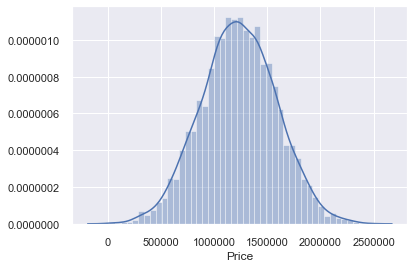

In [247]:
# Wizualizacja rozkladu zmiennej 'Price'
sns.distplot(USAhousing['Price'])

In [248]:
#USAhousing['Price'].hist(bins=25, figsize=(6, 4));

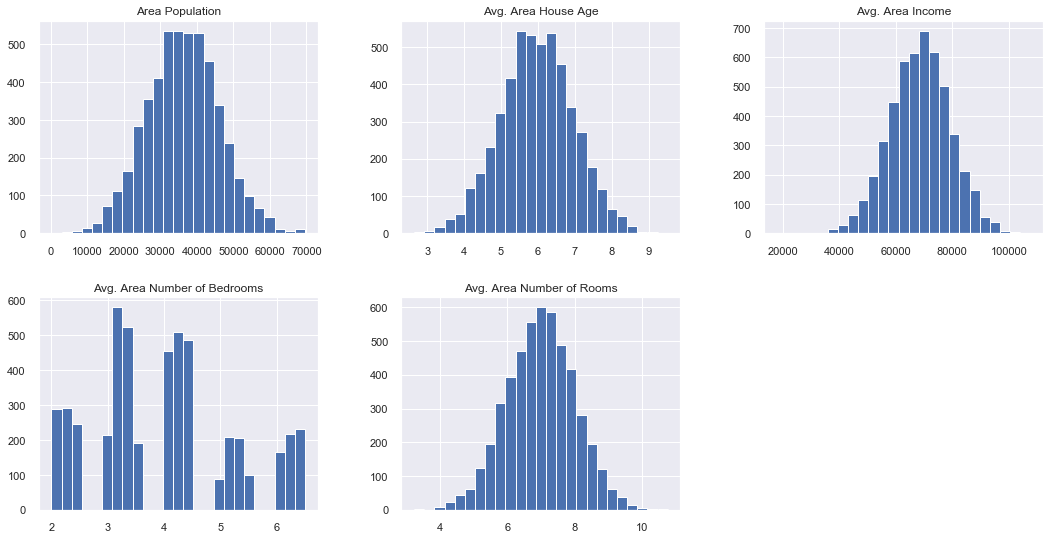

In [249]:
#sns.distplot(USAhousing['Area Population'])
numerical = ['Avg. Area Number of Rooms', 'Avg. Area House Age', 'Avg. Area Number of Bedrooms', 
             'Area Population', 'Avg. Area Income']
USAhousing[numerical].hist(bins=25, figsize=(18, 9), layout=(2, 3));

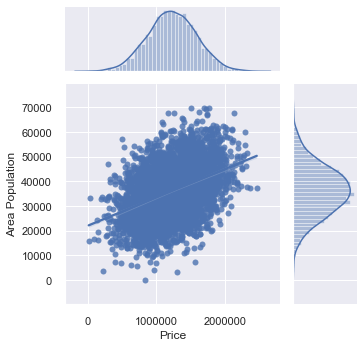

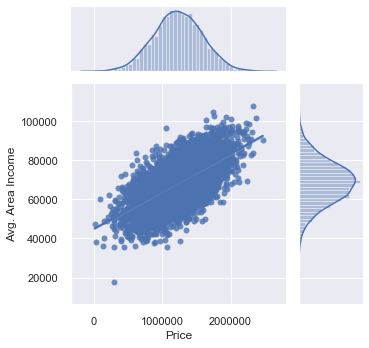

In [250]:
numerical = ['Area Population', 'Avg. Area Income']
sns.jointplot(x=USAhousing['Price'], y=USAhousing[numerical[0]], data=USAhousing, kind="reg", 
              height=5, ratio=3, color="b");
sns.jointplot(x=USAhousing['Price'], y=USAhousing[numerical[1]], data=USAhousing, kind="reg", 
              height=5, ratio=3, color="b");

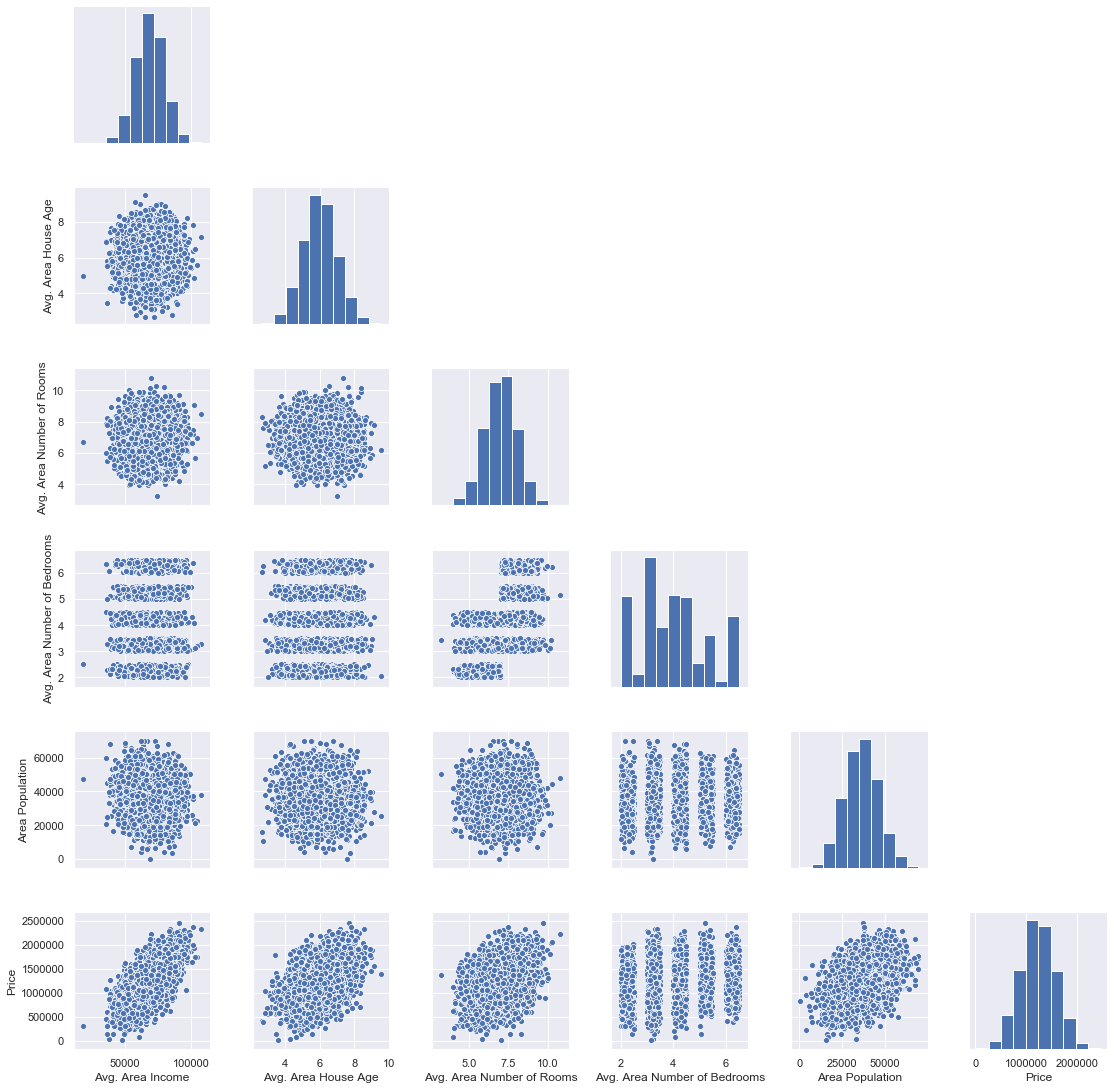

In [107]:
# Korelacja między zmiennymi
#sns.pairplot(USAhousing, hue='Avg. Area Number of Bedrooms')
sns.pairplot(USAhousing, corner=True)

In [108]:
corr = USAhousing.corr()
corr

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000,-0.002,-0.011,0.020,-0.016,0.640
Avg. Area House Age,-0.002,1.000,-0.009,0.006,-0.019,0.453
Avg. Area Number of Rooms,-0.011,-0.009,1.000,0.463,0.002,0.336
Avg. Area Number of Bedrooms,0.020,0.006,0.463,1.000,-0.022,0.171
Area Population,-0.016,-0.019,0.002,-0.022,1.000,0.409
Price,0.640,0.453,0.336,0.171,0.409,1.000


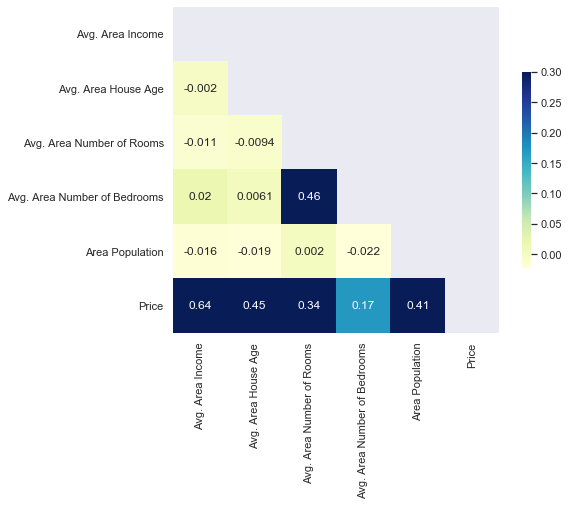

In [109]:
# Korelacja między zmiennymi
#sns.heatmap(USAhousing.corr(), annot=True, cmap="YlGnBu")

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("darkgrid"): #darkgrid, whitegrid, dark, white, ticks
    f, ax = plt.subplots(figsize=(8, 6))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap="YlGnBu",
                     cbar_kws={"shrink": .6})

In [110]:
#sns.set(style="white")
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
#f, ax = plt.subplots(figsize=(8, 6))
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [111]:
dfd = pd.DataFrame(USAhousing.corr()['Price'].sort_values(ascending=False))
dfd

,Price
Price,1.000
Avg. Area Income,0.640
Avg. Area House Age,0.453
Area Population,0.409
Avg. Area Number of Rooms,0.336
Avg. Area Number of Bedrooms,0.171


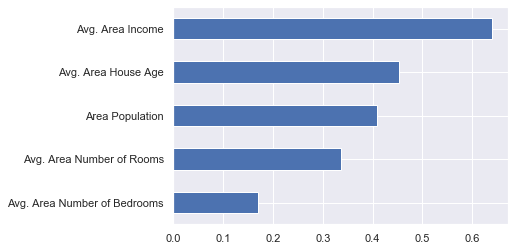

In [112]:
sns.set()
USAhousing.corr()['Price'].sort_values()[:-1].plot(kind='barh')

## &#x1F34A; <font color='orange'>Przygotowanie danych do modelu</font>

In [113]:
# Podział zmiennych na zmienną objaśnianą y i zmienne objaśniające X
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [114]:
y[:5]

0   1,059,033.558
1   1,505,890.915
2   1,058,987.988
3   1,260,616.807
4     630,943.489
Name: Price, dtype: float64

In [115]:
X[:5]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,"79,545.459",5.683,7.009,4.090,"23,086.801"
1,"79,248.642",6.003,6.731,3.090,"40,173.072"
2,"61,287.067",5.866,8.513,5.130,"36,882.159"
3,"63,345.240",7.188,5.587,3.260,"34,310.243"
4,"59,982.197",5.041,7.839,4.230,"26,354.109"


In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

print(f'X_trian shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_trian shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_trian shape: (3000, 5)
X_test shape: (2000, 5)
y_trian shape: (3000,)
y_test shape: (2000,)


## &#x1F34F; <font color='green'>Budowa modelu</font>

In [117]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
print(f'R2 score: {regressor.score(X_test, y_test):.4f}')

R2 score: 0.9177


In [119]:
print(f'Intercept: {regressor.intercept_:,.2f}')

Intercept: -2,640,159.80


In [120]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
#coeff_df_r = np.round(coeff_df, decimals=2)
coeff_df

,Coefficient
Avg. Area Income,21.528
Avg. Area House Age,"164,883.282"
Avg. Area Number of Rooms,"122,368.678"
Avg. Area Number of Bedrooms,"2,233.802"
Area Population,15.150


## &#x1F34F; <font color='green'>Predykcja</font>

In [121]:
y_pred = regressor.predict(X_test)
y_pred[:10]

array([1260960.7057,  827588.7556, 1742421.2425,  974625.3874,
        998717.842 ,  645754.0884, 1083215.9092,  855334.9487,
       1445671.4003, 1202846.0144])

In [122]:
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] -  predictions['y_pred']
predictions.head()

,y_true,y_pred,error
1718,"1,251,688.616","1,260,960.706","-9,272.090"
2511,"873,048.320","827,588.756","45,459.564"
345,"1,696,977.663","1,742,421.243","-45,443.580"
2521,"1,063,964.288","974,625.387","89,338.900"
54,"948,788.276","998,717.842","-49,929.566"


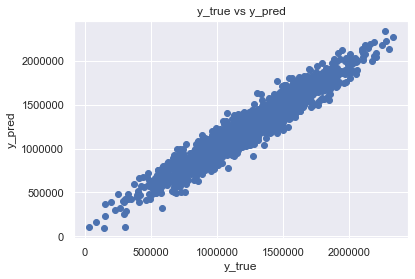

In [123]:
sns.set(style="darkgrid") #white, dark, whitegrid, darkgrid, ticks
f, ax = plt.subplots(figsize=(6, 4))
 
plt.title('y_true vs y_pred')  
plt.xlabel('y_true')  
plt.ylabel('y_pred')  
plt.scatter(y_test,y_pred)

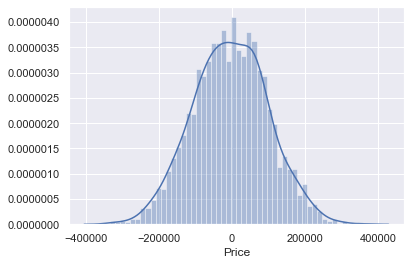

In [124]:
sns.distplot((y_test-y_pred),bins=50);

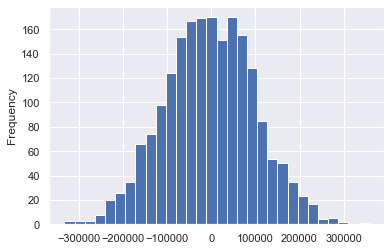

In [125]:
predictions.error.plot(kind='hist', bins=30)

/Users/ewelina/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


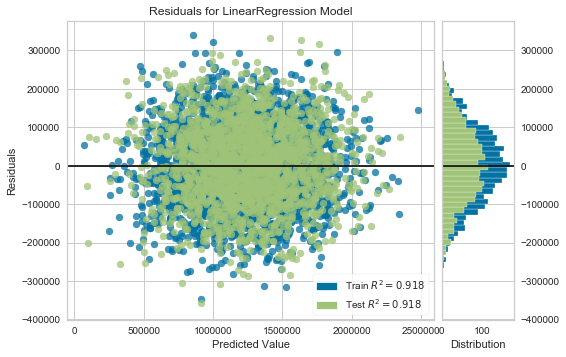

In [126]:
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(regressor)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [127]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_true, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f'MAE wynosi: {mae:0,.2f}')
print(f'MSE wynosi: {mse:0,.2f}')
print(f'RMSE wynosi: {rmse:0,.2f}')

MAE wynosi: 82,288.22
MSE wynosi: 10,460,958,907.21
RMSE wynosi: 102,278.83


In [128]:
print(f'Intercept: {regressor.intercept_:0,.2f}')

Intercept: -2,640,159.80


In [136]:
#X.columns

In [137]:
for a,b in zip(regressor.coef_,X.columns):
            print(f'{b:>28s} =  {a:>10,.2f}')

            Avg. Area Income =       21.53
         Avg. Area House Age =  164,883.28
   Avg. Area Number of Rooms =  122,368.68
Avg. Area Number of Bedrooms =    2,233.80
             Area Population =       15.15


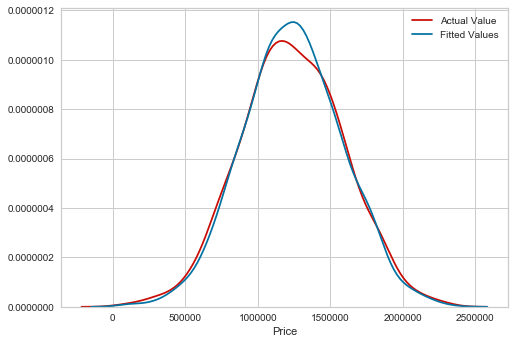

In [151]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

## &#x1F34F; <font color='green'>Dobór cech modelu - eliminacja wsteczna</font>

In [168]:
import statsmodels.api as sm

X_train_ols = X_train.copy()
X_train_ols = X_train_ols.values
X_train_ols = sm.add_constant(X_train_ols)

In [169]:
ols = sm.OLS(endog=y_train, exog=X_train_ols).fit()
predictors = ['const'] + list(X_train.columns)
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     6715.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        21:33:45   Log-Likelihood:                -38807.
No. Observations:                3000   AIC:                         7.763e+04
Df Residuals:                    2994   BIC:                         7.766e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [174]:
X_selected = X_train_ols[:, [0, 1, 2, 3, 5]]
predictors.remove('Avg. Area Number of Bedrooms')

ols = sm.OLS(endog=y_train, exog=X_selected).fit()
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     8391.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        21:39:01   Log-Likelihood:                -38807.
No. Observations:                3000   AIC:                         7.762e+04
Df Residuals:                    2995   BIC:                         7.765e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## &#x1F34F; <font color='green'>Dobór cech modelu - eliminacja wsteczna - automatyzacja</font>

In [218]:
X_train_numpy = X_train.values
X_train_numpy = sm.add_constant(X_train_numpy)

X_test_numpy = X_test.values
X_test_numpy = sm.add_constant(X_test_numpy)

num_vars = len(X_train_numpy[0])

predictors = ['const'] + list(X_train.columns)
sl = 0.05

for i in range(0, num_vars):
    model = sm.OLS(endog=y_train, exog=X_train_numpy).fit()
    max_pval = max(model.pvalues.astype('float'))
    if max_pval > sl:
        for j in range(0, num_vars - i):
            if model.pvalues[j].astype('float') == max_pval:
                X_train_numpy = np.delete(X_train_numpy, j, axis=1)
                X_test_numpy = np.delete(X_test_numpy, j, axis=1)
                predictors.remove(predictors[j])

print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     8391.
Date:                Sun, 26 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:17:07   Log-Likelihood:                -38807.
No. Observations:                3000   AIC:                         7.762e+04
Df Residuals:                    2995   BIC:                         7.765e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [188]:
ols.save('model.USAhousing')

In [236]:
y_pred = model.predict(X_test_numpy)
y_pred[:5]

array([1261202.4618,  823129.7565, 1745580.9617,  973475.2507,
        993697.6117])

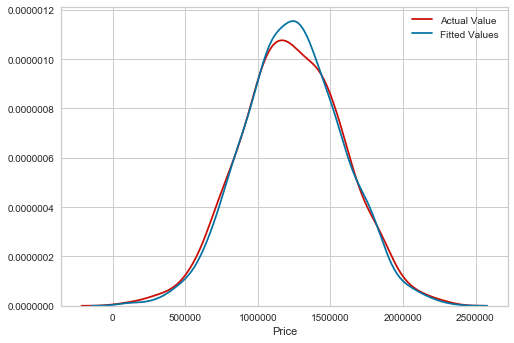

In [237]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

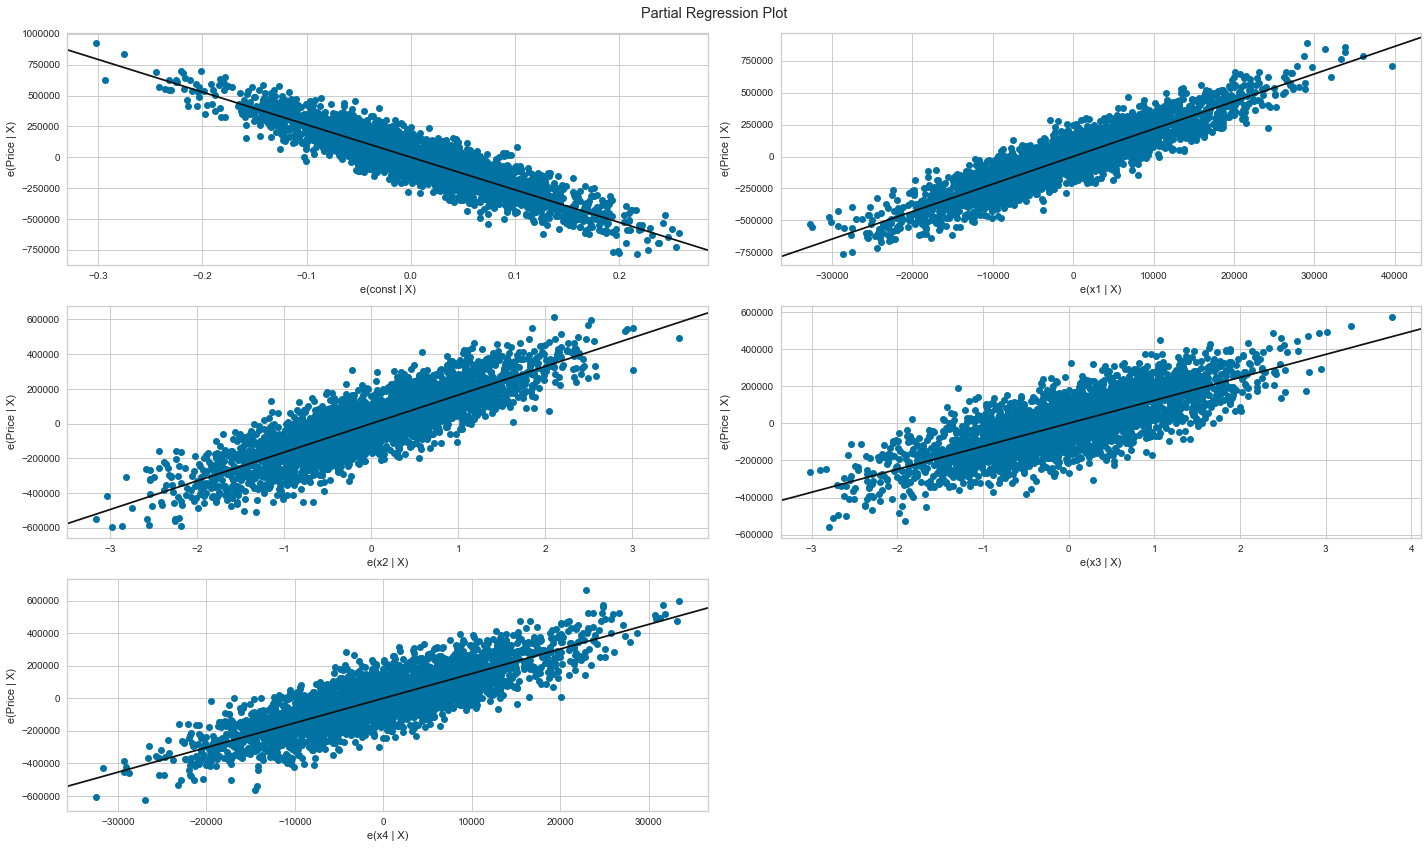

In [147]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(ols, fig=fig)